In [0]:
import keras
from keras.datasets import imdb
import numpy as np

In [0]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Let's explore the data
When we look at the training data we see every word is represented by a number.
This number represents an index. 

In the previous code block we limited the amount of different words to the 10000 most common words. 
In other words, we ignore special words.



In [9]:
training_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

We can look up the word a given index is linked to, by downloading the imdb word index:

In [4]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
print(word_index['hello'])

4822


In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [14]:
reverse_word_index[4822]

'hello'

In [28]:
get_full_text = lambda sample_index: ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[sample_index]])
get_full_text(0)

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [29]:
train_labels[0]

1

# Preparing the data
Create binary vectors of each text

In [0]:
def create_bin_sequence(sequence):
  res = np.zeros((len(sequence), 10000))
  for i, sequence in enumerate(sequence):
    res[i, sequence] = 1.
  return res
x_train = create_bin_sequence(train_data)
x_test = create_bin_sequence(test_data)

In [49]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Creating the model

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Below we show how easy it is to add custom loss or accuracy functions


In [0]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy',
             metrics=[metrics.binary_accuracy])

Adding a validation set to monitor progress during training:

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [106]:
hist = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 233us/step - loss: 0.5314 - binary_accuracy: 0.7683 - val_loss: 0.3933 - val_binary_accuracy: 0.8713
Epoch 2/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.3173 - binary_accuracy: 0.9004 - val_loss: 0.3061 - val_binary_accuracy: 0.8892
Epoch 3/20
15000/15000 [==============================] - 3s 190us/step - loss: 0.2203 - binary_accuracy: 0.9282 - val_loss: 0.3222 - val_binary_accuracy: 0.8686
Epoch 4/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1722 - binary_accuracy: 0.9449 - val_loss: 0.3068 - val_binary_accuracy: 0.8779
Epoch 5/20
15000/15000 [==============================] - 3s 191us/step - loss: 0.1375 - binary_accuracy: 0.9559 - val_loss: 0.2820 - val_binary_accuracy: 0.8896
Epoch 6/20
15000/15000 [==============================] - 3s 192us/step - loss: 0.1135 - binary_accuracy: 0.9650 - val_loss: 0.2964 - val_bi

In [59]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 116us/step


[0.7297059852194786, 0.85132]

In [58]:
model.metrics_names

['loss', 'binary_accuracy']

# Let's visualize the results

In [0]:
import matplotlib.pyplot as plt

In [101]:
print(hist.history.keys())
acc = hist.history['binary_accuracy']
val_acc = hist.history['val_binary_accuracy']

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])


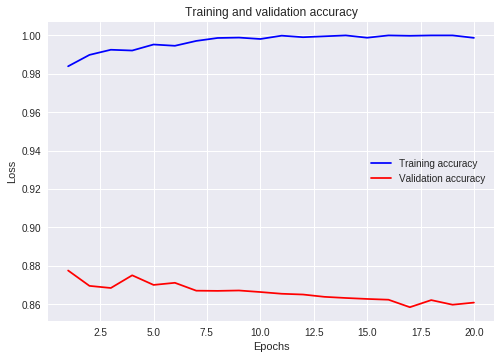

In [102]:
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

THis is a clear case of overfitting. Regularization techniques would be required to perform better on the validation and test set.

A best practice is to tweak your model and regularization configuration based on validation accuracy. This is because by tweaking you could
manually overfit on the validation set. By keeping a test set until the end, you make sure that you didn't overfit the test set as well.